In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import friedmanchisquare, wilcoxon, mannwhitneyu

load data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
images = np.load('/content/drive/MyDrive/Arlette/Sets for Training /Dataset with iPhone/test_images_160x320.npy')
true_landamarks = np.load('/content/drive/MyDrive/Arlette/Sets for Training /Dataset with iPhone/test_landmarks.npy')

CNN_full_augmentation = np.load('/content/drive/MyDrive/Arlette/Model_Outputs/predictions_norm_CNN_full_augmentation.npy')
UNET_full_augmenatation = np.load('/content/drive/MyDrive/Arlette/Model_Outputs/predictions_norm_UNET_full_augmentation.npy')

CNN_no_blur_augmentation = np.load('/content/drive/MyDrive/Arlette/Model_Outputs/predictions_norm_CNN_no_blur_augmentation.npy')
UNET_no_blur_augmentation = np.load('/content/drive/MyDrive/Arlette/Model_Outputs/predictions_norm_UNET_no_blur_augmentation.npy')

CNN_no_augmentation = np.load('/content/drive/MyDrive/Arlette/Model_Outputs/predictions_norm_CNN_no_augmentation.npy')
UNET_no_augmentation = np.load('/content/drive/MyDrive/Arlette/Model_Outputs/predictions_norm_UNET_no_augmentation.npy')

CNN_50 = np.load('/content/drive/MyDrive/Arlette/Model_Outputs/predictions_norm_CNN_full_augmentation_50_.npy')
UNET_50 = np.load('/content/drive/MyDrive/Arlette/Model_Outputs/predictions_norm_UNET_full_augmentation_50.npy')

CNN_25 = np.load('/content/drive/MyDrive/Arlette/Model_Outputs/predictions_norm_CNN_full_augmentation_25.npy')
UNET_25 = np.load('/content/drive/MyDrive/Arlette/Model_Outputs/predictions_norm_UNET_full_augmentation_25.npy')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Arlette/df_with_metadata.csv')

In [ ]:
idx_test= np.load('/content/drive/MyDrive/Arlette/idx_test.npy')
y_test_genera  = df.loc[idx_test, "Genus"].values
y_test_species = df.loc[idx_test, "LABEL"]

calculate erros

In [ ]:
height, width = 160, 320

# calculate landamrk mean pixel error
def landmark_mpe(y_true, y_pred, width, height):
    y_true_dn = y_true.copy()
    y_pred_dn = y_pred.copy()

    y_true_dn[:,:,0] *= width
    y_true_dn[:,:,1] *= height
    y_pred_dn[:,:,0] *= width
    y_pred_dn[:,:,1] *= height

    # euclidean distance per landmark
    return np.sqrt(np.sum((y_true_dn - y_pred_dn)**2, axis=2))  # (n, 18)

In [ ]:
# CNN mean pixel error
errors_CNN_full = landmark_mpe(true_landamarks, CNN_full_augmentation, width, height)
errors_CNN_no_blur = landmark_mpe(true_landamarks, CNN_no_blur_augmentation, width, height)
errors_CNN_none = landmark_mpe(true_landamarks, CNN_no_augmentation, width, height)
errors_CNN_50 = landmark_mpe(true_landamarks, CNN_50, width, height)
errors_CNN_25 = landmark_mpe(true_landamarks, CNN_25, width, height)

# UNet mean pixel errors
errors_UNET_full = landmark_mpe(true_landamarks, UNET_full_augmenatation, width, height)
errors_UNET_no_blur = landmark_mpe(true_landamarks, UNET_no_blur_augmentation, width, height)
errors_UNET_none = landmark_mpe(true_landamarks, UNET_no_augmentation, width, height)
errors_UNET_50 = landmark_mpe(true_landamarks, UNET_50, width, height)
errors_UNET_25 = landmark_mpe(true_landamarks, UNET_25, width, height)

# summarize all errors per model
errors_CNN_all = np.concatenate([errors_CNN_full, errors_CNN_no_blur, errors_CNN_none, errors_CNN_50, errors_CNN_25], axis=0)
errors_UNET_all = np.concatenate([errors_UNET_full, errors_UNET_no_blur, errors_UNET_none, errors_UNET_50, errors_UNET_25], axis=0)

boxplot mean pixel error per landmark for all experiments

summarize error for each experiment

In [ ]:
# all experiments per model as dict
experiments_CNN = {"Full Aug": errors_CNN_full, "No Blur": errors_CNN_no_blur, "No Aug": errors_CNN_none, "50%": errors_CNN_50, "25%": errors_CNN_25}
experiments_UNET = {"Full Aug": errors_UNET_full, "No Blur": errors_UNET_no_blur, "No Aug": errors_UNET_none, "50%": errors_UNET_50, "25%": errors_UNET_25}

# summarize errors for each experiment
def summarize_errors(experiments, model_name):
    print(f"\n{model_name} Landmark MPE summary:\n")
    for exp_name, errors in experiments.items():
        print(f"Experiment: {exp_name}")
        for lm in range(errors.shape[1]):  # landmarks 0-17
            lm_errors = errors[:, lm]
            mean = np.mean(lm_errors)
            std = np.std(lm_errors)
            median = np.median(lm_errors)
            print(f"  Landmark {lm+1}: Mean ± SD = {mean:.2f} ± {std:.2f}, Median = {median:.2f}")
        print("\n" + "-"*50 + "\n")

In [ ]:
# CNN
summarize_errors(experiments_CNN, "CNN")

# U-Net
summarize_errors(experiments_UNET, "U-Net")


CNN Landmark MPE summary:

Experiment: Full Aug
  Landmark 1: Mean ± SD = 10.44 ± 7.53, Median = 8.63
  Landmark 2: Mean ± SD = 9.40 ± 6.18, Median = 8.29
  Landmark 3: Mean ± SD = 8.61 ± 6.06, Median = 7.25
  Landmark 4: Mean ± SD = 7.26 ± 5.38, Median = 6.19
  Landmark 5: Mean ± SD = 5.66 ± 4.72, Median = 4.85
  Landmark 6: Mean ± SD = 6.32 ± 5.03, Median = 5.33
  Landmark 7: Mean ± SD = 7.27 ± 5.30, Median = 6.15
  Landmark 8: Mean ± SD = 6.27 ± 4.85, Median = 5.19
  Landmark 9: Mean ± SD = 6.55 ± 5.15, Median = 5.35
  Landmark 10: Mean ± SD = 6.75 ± 4.74, Median = 5.72
  Landmark 11: Mean ± SD = 9.24 ± 6.65, Median = 7.64
  Landmark 12: Mean ± SD = 8.11 ± 5.78, Median = 6.96
  Landmark 13: Mean ± SD = 7.83 ± 5.63, Median = 6.65
  Landmark 14: Mean ± SD = 7.35 ± 5.26, Median = 6.25
  Landmark 15: Mean ± SD = 7.47 ± 5.32, Median = 6.34
  Landmark 16: Mean ± SD = 7.86 ± 5.32, Median = 6.89
  Landmark 17: Mean ± SD = 11.92 ± 7.99, Median = 10.61
  Landmark 18: Mean ± SD = 8.53 ± 5.84,

heatmaps for landmark error per model

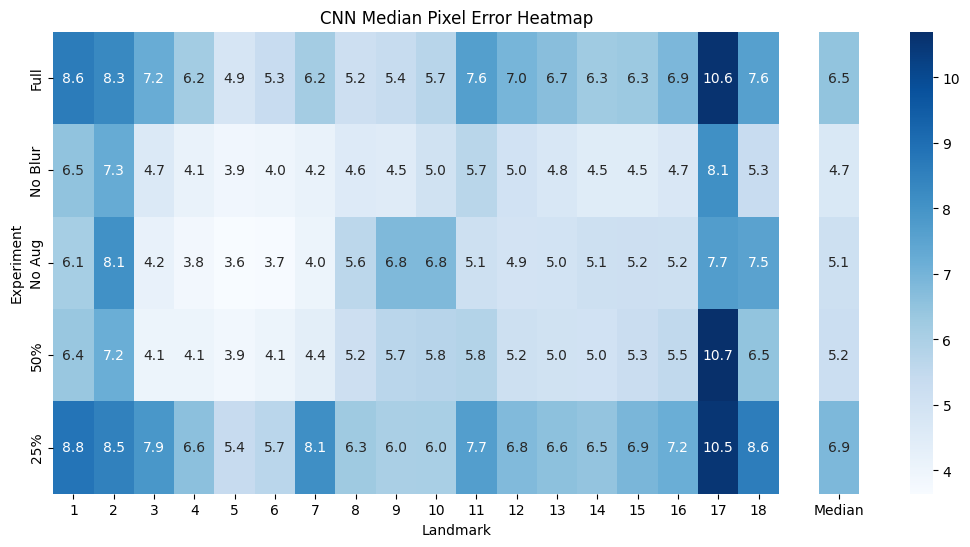

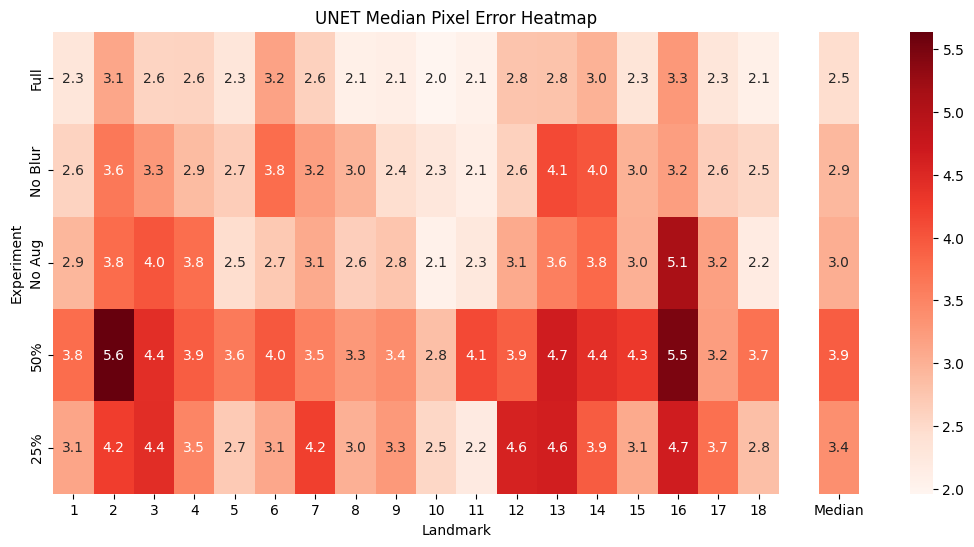

In [ ]:
experiments = ['Full', 'No Blur', 'No Aug', '50%', '25%']

errors_dict_CNN = {'Full': errors_CNN_full, 'No Blur': errors_CNN_no_blur, 'No Aug': errors_CNN_none, '50%': errors_CNN_50, '25%': errors_CNN_25}
errors_dict_UNET = {'Full': errors_UNET_full, 'No Blur': errors_UNET_no_blur, 'No Aug': errors_UNET_none, '50%': errors_UNET_50, '25%': errors_UNET_25}

# median mean pixel error per model
median_mpes_CNN = np.array([np.median(errors_dict_CNN[exp], axis=0) for exp in experiments])
median_mpes_UNET = np.array([np.median(errors_dict_UNET[exp], axis=0) for exp in experiments])

# extra column: median across landmarks (per experiment)
median_per_exp_CNN = np.median(median_mpes_CNN, axis=1)[:, np.newaxis]
median_per_exp_UNET = np.median(median_mpes_UNET, axis=1)[:, np.newaxis]

# dummy column (for spacing)
dummy_col = np.full((len(experiments), 1), np.nan)  # NaN -> white in heatmap

# concatenate: landmarks + dummy + median
median_mpes_CNN_with_space = np.hstack([median_mpes_CNN, dummy_col, median_per_exp_CNN])
median_mpes_UNET_with_space = np.hstack([median_mpes_UNET, dummy_col, median_per_exp_UNET])

# label 1-18 + median
xticklabels = list(range(1, 19)) + ["Median"]

n_cols = median_mpes_CNN_with_space.shape[1]  # = 20 (18 + dummy + median)

# centered labels
tick_positions = np.arange(n_cols) + 0.5

# no label for dummy
tick_positions_final = list(tick_positions[:18]) + [tick_positions[-1]]

# CNN heatmap
plt.figure(figsize=(13,6))
ax = sns.heatmap(median_mpes_CNN_with_space,
                 annot=True, fmt=".1f", cmap='Blues',
                 yticklabels=experiments)

ax.set_xticks(tick_positions_final)
ax.set_xticklabels(xticklabels)

plt.xlabel("Landmark")
plt.ylabel("Experiment")
plt.title("CNN Median Pixel Error Heatmap")
plt.show()


# UNet heatmap
plt.figure(figsize=(13,6))
ax = sns.heatmap(median_mpes_UNET_with_space,
                 annot=True, fmt=".1f", cmap='Reds',
                 yticklabels=experiments)

ax.set_xticks(tick_positions_final)
ax.set_xticklabels(xticklabels)

plt.xlabel("Landmark")
plt.ylabel("Experiment")
plt.title("UNET Median Pixel Error Heatmap")
plt.show()

median mpe as table

In [ ]:
experiments = ['Full', 'No Blur', 'No Aug', '50%', '25%']

# median pixel error per landmark
median_mpes_CNN = np.array([np.median(errors_dict_CNN[exp], axis=0) for exp in experiments])
median_mpes_UNET = np.array([np.median(errors_dict_UNET[exp], axis=0) for exp in experiments])

# landmark labels
landmarks = [f'LM{i+1}' for i in range(median_mpes_CNN.shape[1])]

# df for CNN
df_CNN = pd.DataFrame(median_mpes_CNN, index=experiments, columns=landmarks)
df_CNN.index.name = "Experiment"

# df for UNet
df_UNET = pd.DataFrame(median_mpes_UNET, index=experiments, columns=landmarks)
df_UNET.index.name = "Experiment"

# table
print("CNN Median Pixel Error (MedPE) Table:")
print(df_CNN.round(2))

print("\nUNET Median Pixel Error (MedPE) Table:")
print(df_UNET.round(2))

CNN Median Pixel Error (MedPE) Table:
             LM1   LM2   LM3   LM4   LM5   LM6   LM7   LM8   LM9  LM10  LM11  \
Experiment                                                                     
Full        8.63  8.29  7.25  6.19  4.85  5.33  6.15  5.19  5.35  5.72  7.64   
No Blur     6.53  7.25  4.66  4.14  3.92  3.99  4.16  4.55  4.52  5.03  5.71   
No Aug      6.12  8.07  4.19  3.85  3.64  3.68  4.04  5.64  6.82  6.83  5.14   
50%         6.39  7.18  4.05  4.06  3.87  4.05  4.38  5.16  5.67  5.75  5.83   
25%         8.84  8.52  7.89  6.62  5.38  5.68  8.12  6.28  6.02  6.04  7.68   

            LM12  LM13  LM14  LM15  LM16   LM17  LM18  
Experiment                                             
Full        6.96  6.65  6.25  6.34  6.89  10.61  7.63  
No Blur     5.01  4.77  4.48  4.49  4.73   8.10  5.35  
No Aug      4.94  4.98  5.14  5.17  5.15   7.72  7.54  
50%         5.15  5.04  5.00  5.28  5.54  10.70  6.48  
25%         6.79  6.58  6.48  6.92  7.17  10.51  8.61  

UNET Med

boxplot mean pixel errors for standard experiment

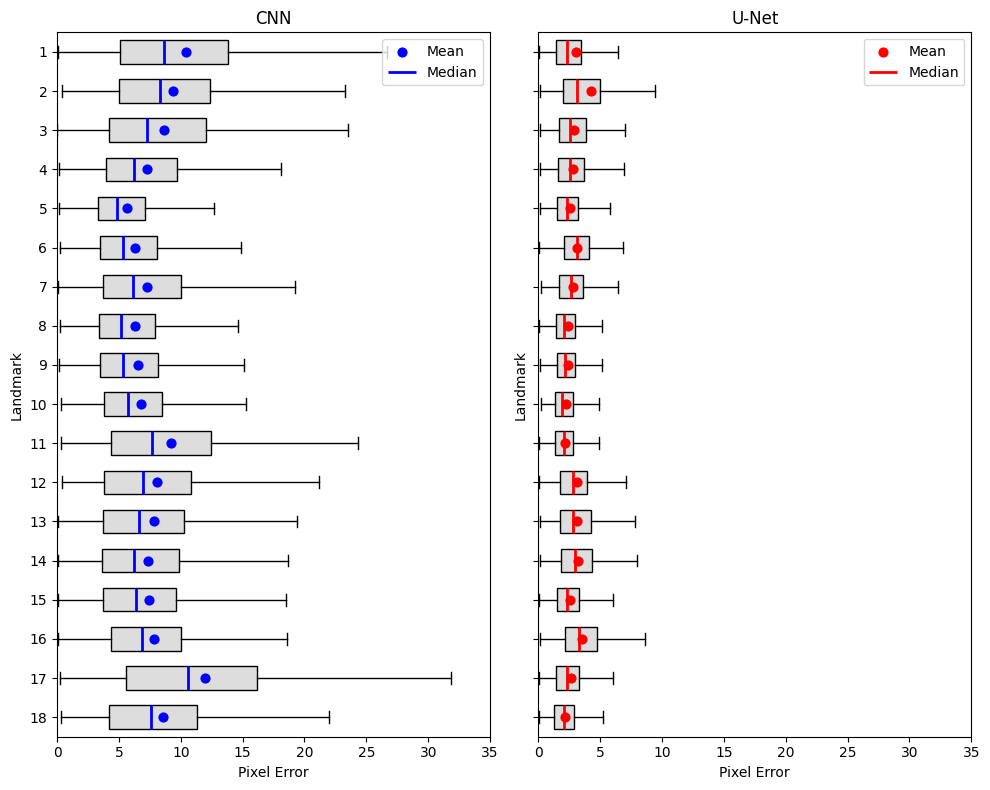

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# same axes scaling
x_min, x_max = 0, 35

models = ['CNN', 'U-Net']
errors_models = [errors_CNN_full, errors_UNET_full]
colors = ['blue', 'red']

fig, axes = plt.subplots(
    nrows=1, ncols=2,
    figsize=(10, 8),
    sharey=True
)

# label 1 to 18 (from top to bottom)
y_labels = [str(i) for i in range(1, 19)]

for ax, model_name, errors_mpe, color in zip(axes, models, errors_models, colors):

    # reverse data
    data_reversed = [errors_mpe[:, i] for i in reversed(range(18))]

    # horizontal boxplot
    box = ax.boxplot(
        data_reversed,
        patch_artist=True,
        widths=0.6,
        showfliers=False,
        medianprops=dict(color='none'),  # median
        vert=False)

    for patch in box['boxes']:
        patch.set_facecolor('#DDDDDD')

    # mean dot
    for i, orig_idx in enumerate(reversed(range(18))):
        mean_val = np.mean(errors_mpe[:, orig_idx])
        ax.scatter(mean_val, i+1, color=color, s=40, zorder=3, label='Mean' if i==0 else "")

    # median line
    for i, orig_idx in enumerate(reversed(range(18))):
        median_val = np.median(errors_mpe[:, orig_idx])
        ax.vlines(median_val, i+1-0.3, i+1+0.3, color=color, linewidth=2, label='Median' if i==0 else "")

    # axes limits
    ax.set_xlim(x_min, x_max)
    ax.set_xlabel("Pixel Error")
    ax.set_title(model_name)

    # y
    ax.set_yticks(range(1, 19))
    ax.set_yticklabels(list(reversed(y_labels)))  # labels reversed

    # legend
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), loc='upper right')

# subplots
for ax in axes:
    ax.set_ylabel("Landmark")

plt.tight_layout()
plt.show()


In [ ]:
# median and mean pixel error for standard experiment
median_CNN = np.median(errors_CNN_full, axis=0)
mean_CNN = np.mean(errors_CNN_full, axis=0)
median_UNET = np.median(errors_UNET_full, axis=0)
mean_UNET = np.mean(errors_UNET_full, axis=0)

# calculate sd
sd_CNN = np.std(errors_CNN_full, axis=0)
sd_UNET = np.std(errors_UNET_full, axis=0)

# tables mean, median, sd
cnn_table = pd.DataFrame({'Landmark': [f'LM{i}' for i in range(1,19)], 'Median Pixel Error': median_CNN, 'Mean Pixel Error': mean_CNN, 'SD Pixel Error': sd_CNN})

unet_table = pd.DataFrame({'Landmark': [f'LM{i}' for i in range(1,19)], 'Median Pixel Error': median_UNET, 'Mean Pixel Error': mean_UNET, 'SD Pixel Error': sd_UNET})

print("CNN Landmark Errors:")
print(cnn_table)
print("\nUNet Landmark Errors:")
print(unet_table)

CNN Landmark Errors:
   Landmark  Median Pixel Error  Mean Pixel Error  SD Pixel Error
0       LM1            8.632916         10.435374        7.533188
1       LM2            8.291804          9.402877        6.179307
2       LM3            7.245832          8.614882        6.062780
3       LM4            6.185809          7.259072        5.384371
4       LM5            4.854505          5.661755        4.715315
5       LM6            5.325946          6.324931        5.029906
6       LM7            6.151367          7.267129        5.301352
7       LM8            5.186399          6.272419        4.846327
8       LM9            5.354500          6.547007        5.154138
9      LM10            5.721555          6.748645        4.740035
10     LM11            7.640957          9.238823        6.647222
11     LM12            6.963018          8.114334        5.776574
12     LM13            6.651884          7.832789        5.627743
13     LM14            6.250497          7.354929      

statistics

overall model comparison: CNN vs UNet

In [ ]:
#test that unets predict in general lower values than cnns

# median pixel error per sample
def compute_median_errors(true, pred, width=320, height=160):
    true_scaled = true.copy()
    pred_scaled = pred.copy()
    true_scaled[...,0] *= width
    true_scaled[...,1] *= height
    pred_scaled[...,0] *= width
    pred_scaled[...,1] *= height
    errors = np.sqrt(np.sum((true_scaled - pred_scaled)**2, axis=2))
    return np.median(errors, axis=1)  # median over landamarks per sample

# all experiments
experiments = [("CNN", CNN_full_augmentation, UNET_full_augmenatation), ("No Blur", CNN_no_blur_augmentation, UNET_no_blur_augmentation), ("No Aug", CNN_no_augmentation, UNET_no_augmentation), ("50%", CNN_50, UNET_50), ("25%", CNN_25, UNET_25)]

# get median errors
cnn_medians_all = []
unet_medians_all = []

for name, cnn_pred, unet_pred in experiments:
    cnn_medians_all.append(compute_median_errors(true_landamarks, cnn_pred))
    unet_medians_all.append(compute_median_errors(true_landamarks, unet_pred))

cnn_medians_all = np.concatenate(cnn_medians_all)
unet_medians_all = np.concatenate(unet_medians_all)

# wilcoxon for paired samples
stat, p_value = wilcoxon(cnn_medians_all, unet_medians_all)
print(f"Wilcoxon signed-rank test: stat={stat}, p-value={p_value}")

# get overall median
print(f"Overall Median Pixel Error: CNN = {np.median(cnn_medians_all):.2f}, UNet = {np.median(unet_medians_all):.2f}")

Wilcoxon signed-rank test: stat=455394.0, p-value=0.0
Overall Median Pixel Error: CNN = 5.63, UNet = 3.13


Mann-Whitney-U-Test

In [ ]:
# test
stat, p_value = mannwhitneyu(cnn_medians_all, unet_medians_all, alternative='greater')

# groups
n_cnn = len(cnn_medians_all)
n_unet = len(unet_medians_all)

# max U
U_max = n_cnn * n_unet
U_ratio = stat / U_max

print("Mann-Whitney-U-Test (overall distributions):")
print(f"  U = {stat}, p-value = {p_value}")
print(f"  U_max = {U_max}, U/U_max = {U_ratio:.3f}")
print(f"  Overall Median CNN = {np.median(cnn_medians_all):.2f}")
print(f"  Overall Median UNet = {np.median(unet_medians_all):.2f}")

Mann-Whitney-U-Test (overall distributions):
  U = 21542107.0, p-value = 0.0
  U_max = 24354225, U/U_max = 0.885
  Overall Median CNN = 5.63
  Overall Median UNet = 3.13


In [ ]:
# In 88.5% of cases, a randomly chosen CNN error is higher than a UNet error.

species specific

In [ ]:
# counts samples per species
species_counts = pd.Series(y_test_species).value_counts()

# only species with >= 5
species_list = species_counts[species_counts >= 5].index.values


In [ ]:
errors_list = []

for species in species_list:
    mask = (y_test_species == species)
    idx = np.where(mask)[0]

    # CNN
    cnn_err = errors_CNN_all[idx]
    errors_list.append({
        "Species": species,
        "Model": "CNN",
        "MedianError": np.median(cnn_err),
        "MeanError": np.mean(cnn_err)})

    # UNet
    unet_err = errors_UNET_all[idx]
    errors_list.append({
        "Species": species,
        "Model": "UNet",
        "MedianError": np.median(unet_err),
        "MeanError": np.mean(unet_err)})

errors_df = pd.DataFrame(errors_list)

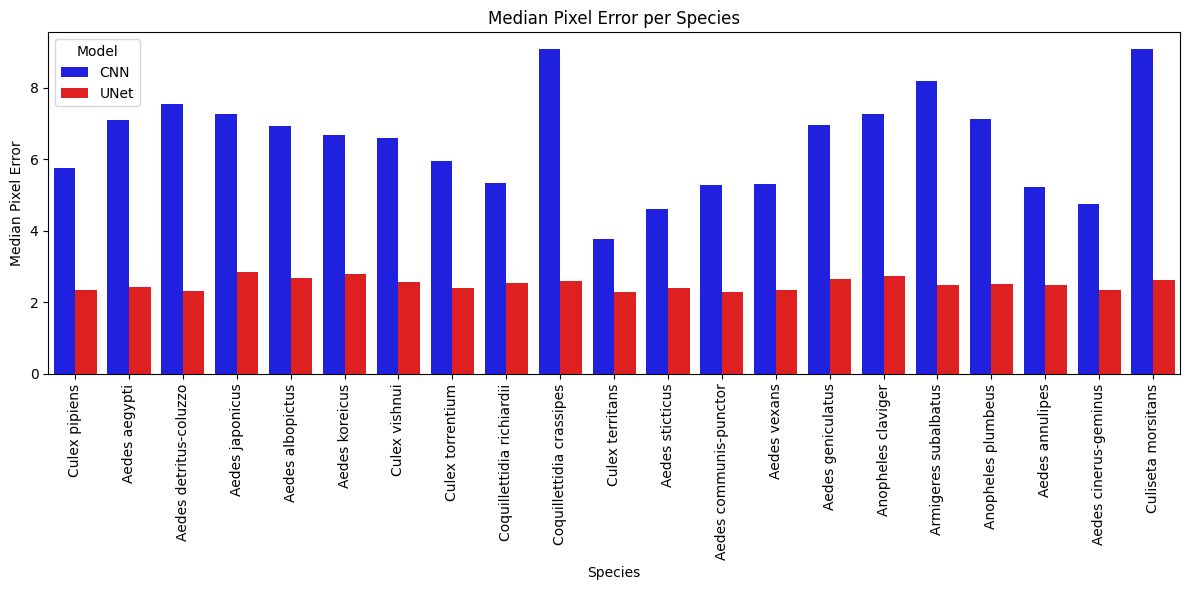

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=errors_df,
    x="Species",
    y="MedianError",
    hue="Model",
    palette={"CNN": "blue", "UNet": "red"})

plt.xticks(rotation=90)
plt.ylabel("Median Pixel Error")
plt.title("Median Pixel Error per Species")
plt.legend(title="Model")
plt.tight_layout()
plt.show()